# Setup

In [44]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [45]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

training = pd.read_csv('./playground-series-s5e11/train.csv', index_col='id')
testing = pd.read_csv('./playground-series-s5e11/test.csv', index_col='id')

training.head(5)

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
id,,,,,,,,,,,,
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


# EDA

In [46]:
training.shape

(593994, 12)

In [47]:
training.info()
training.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 58.9+ MB


,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994,593994,593994,593994,593994,593994,593994.000000
unique,NaN,NaN,NaN,NaN,NaN,3,4,5,5,8,30,NaN
top,NaN,NaN,NaN,NaN,NaN,Female,Single,Bachelor's,Employed,Debt consolidation,C3,NaN
freq,NaN,NaN,NaN,NaN,NaN,306175,288843,279606,450645,324695,58695,NaN
mean,48212.202976,0.120696,680.916009,15020.297629,12.356345,NaN,NaN,NaN,NaN,NaN,NaN,0.798820
std,26711.942078,0.068573,55.424956,6926.530568,2.008959,NaN,NaN,NaN,NaN,NaN,NaN,0.400883
min,6002.430000,0.011000,395.000000,500.090000,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,27934.400000,0.072000,646.000000,10279.620000,10.990000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,46557.680000,0.096000,682.000000,15000.220000,12.370000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,60981.320000,0.156000,719.000000,18858.580000,13.680000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


## EDA Graphs

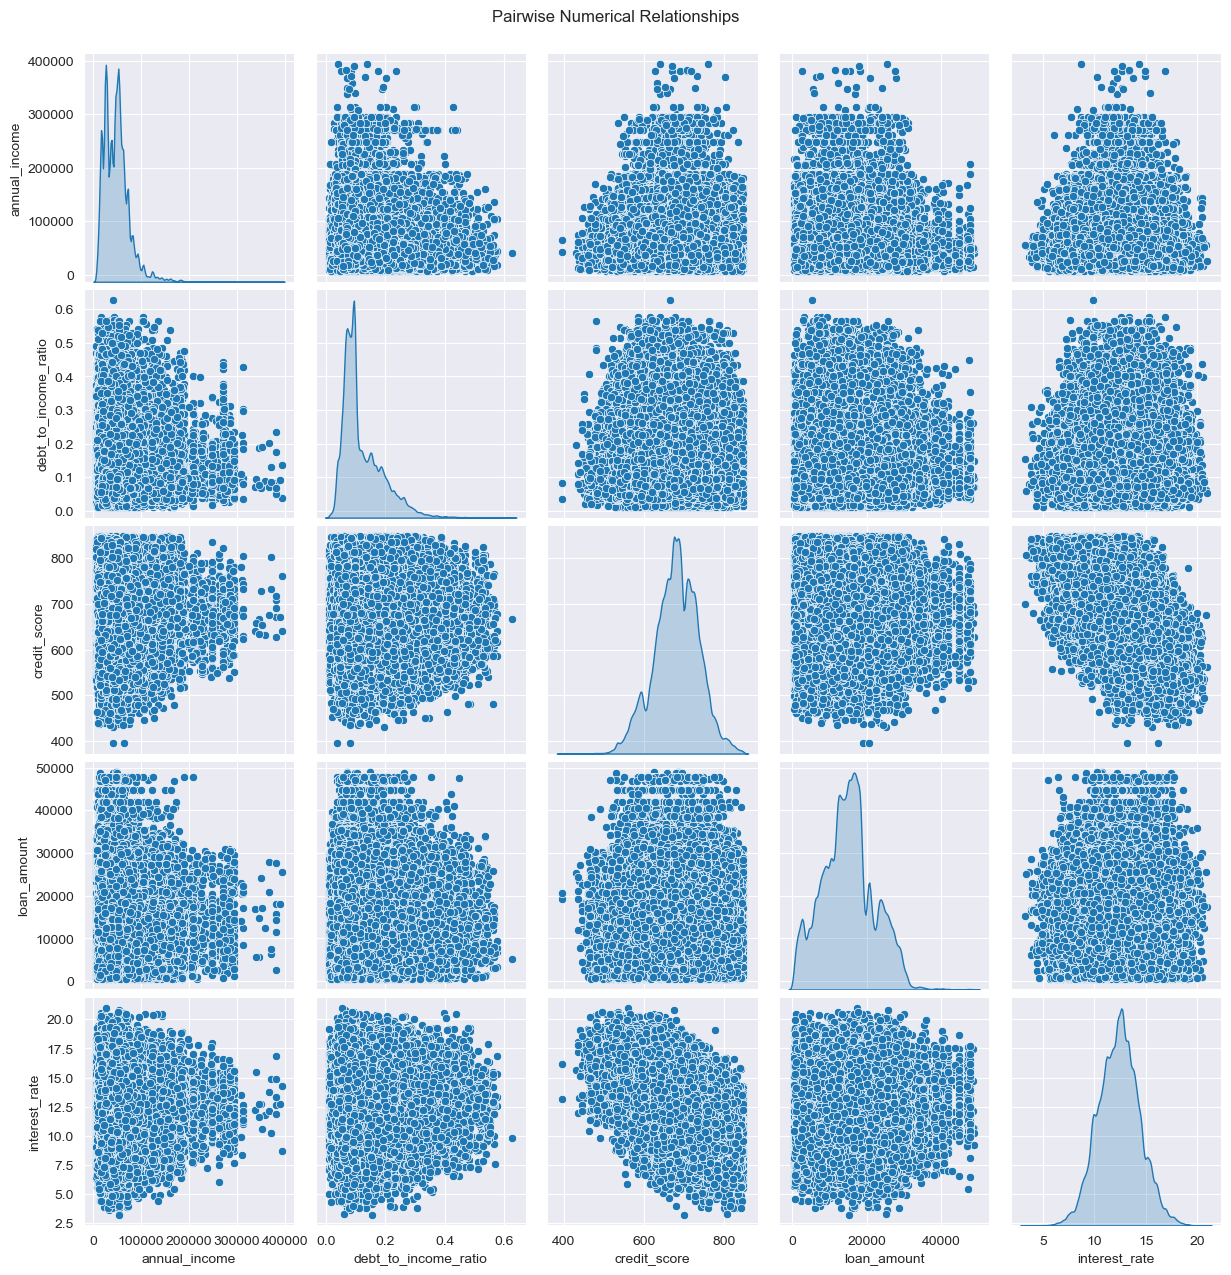

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate
annual_income,1.000000,0.000553,0.001509,-0.003407,-0.002507
debt_to_income_ratio,0.000553,1.000000,-0.061617,-0.008236,0.030316
credit_score,0.001509,-0.061617,1.000000,-0.005761,-0.538335
loan_amount,-0.003407,-0.008236,-0.005761,1.000000,-0.001174
interest_rate,-0.002507,0.030316,-0.538335,-0.001174,1.000000


In [48]:
numerical_vars = ["annual_income","debt_to_income_ratio","credit_score", "loan_amount", "interest_rate"]
categorical_vars = ["gender","marital_status","education_level", "employment_status", "loan_purpose"]

sns.pairplot(training[numerical_vars], diag_kind="kde")
plt.suptitle("Pairwise Numerical Relationships", y=1.02)
plt.show()

training[numerical_vars].corr()

## Outlier Checking

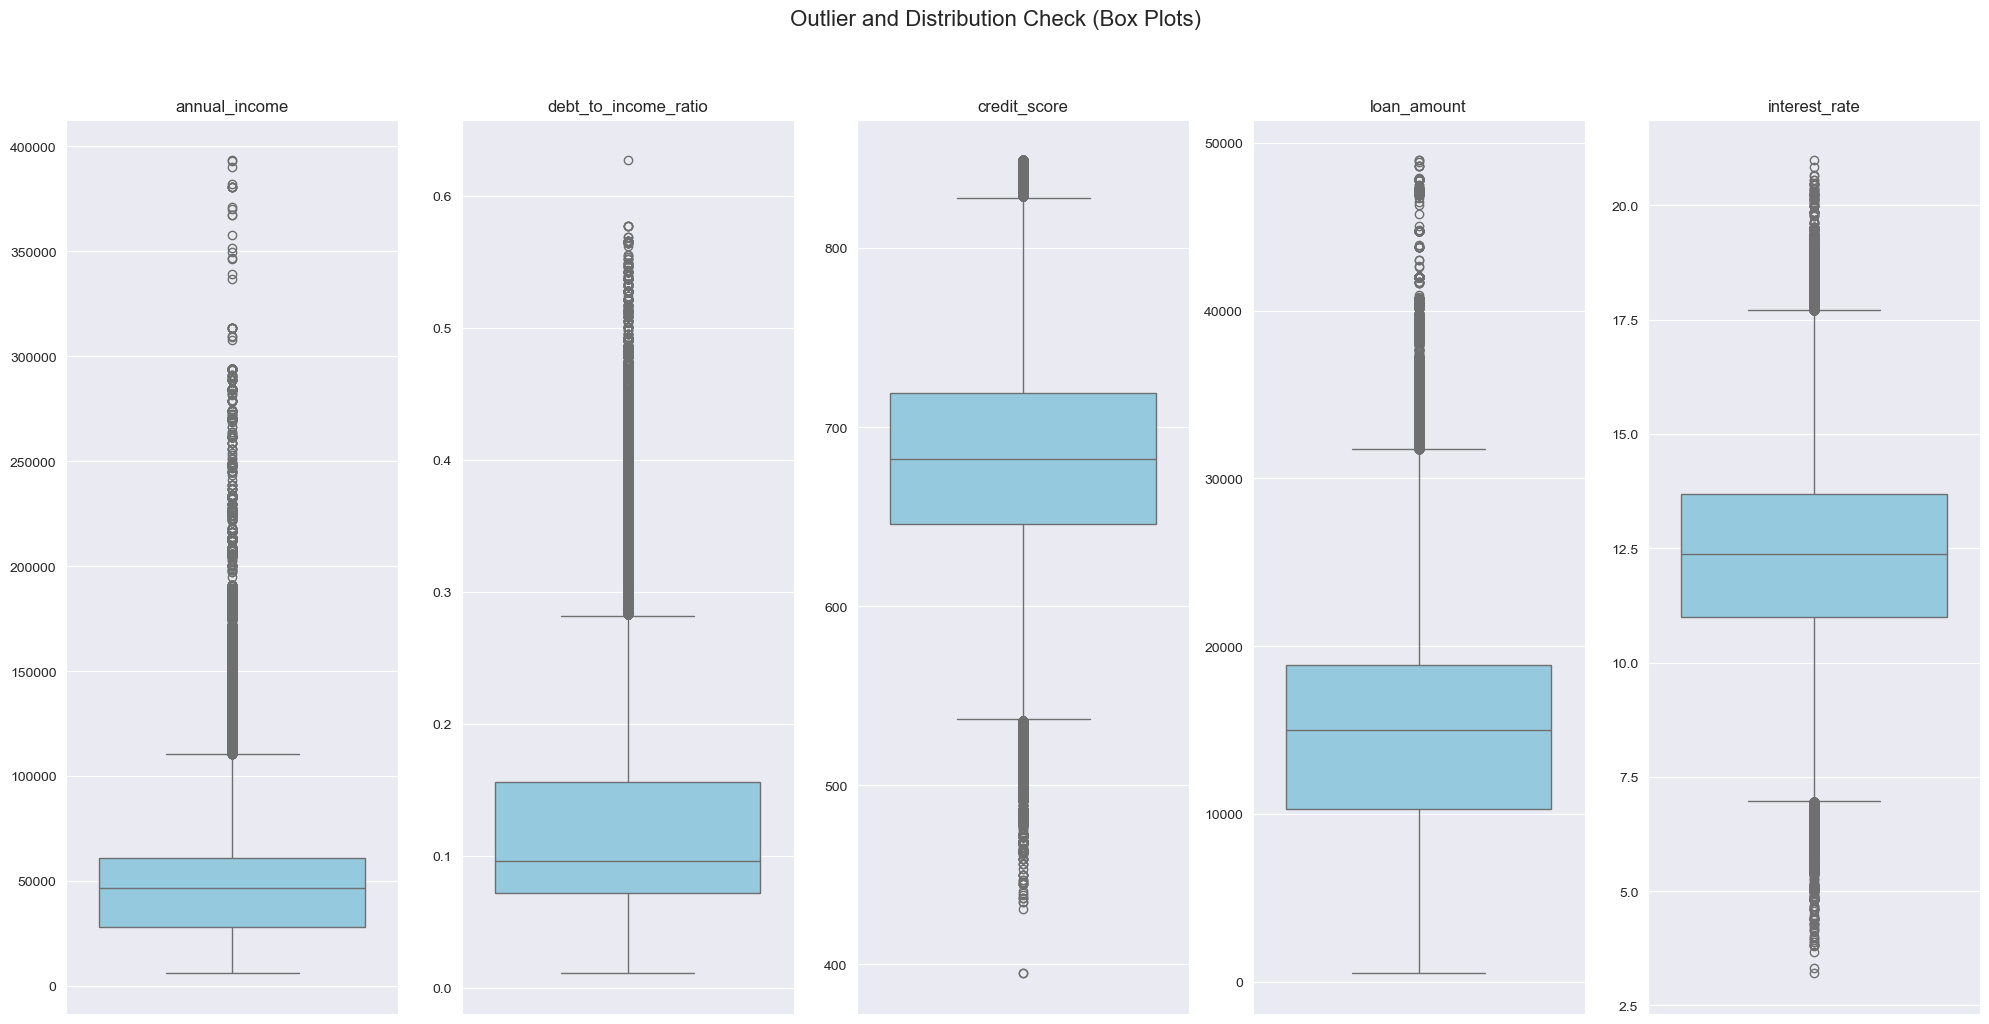

In [49]:
n_numerical_cols = len(numerical_vars)

fig, axes = plt.subplots(1, n_numerical_cols, figsize=(4 * n_numerical_cols, 10))
plt.suptitle("Outlier and Distribution Check (Box Plots)", fontsize=16, y=1.02)

for i, col in enumerate(numerical_vars):
    sns.boxplot(y=training[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Comparing to `loan_paid_back`

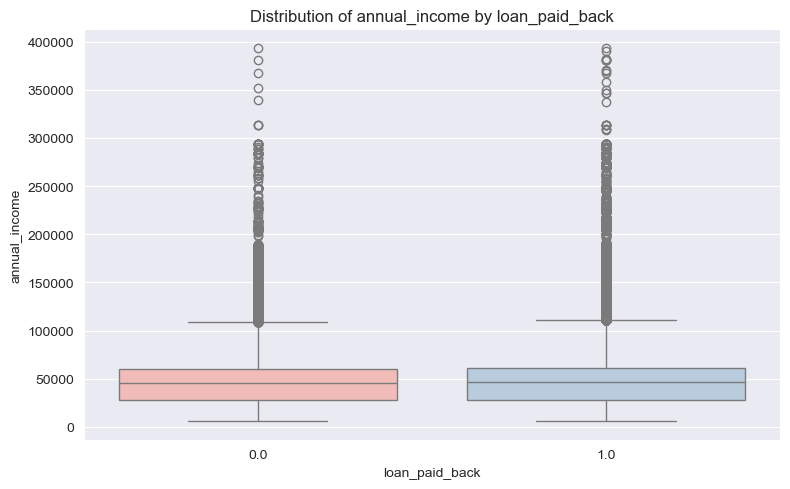

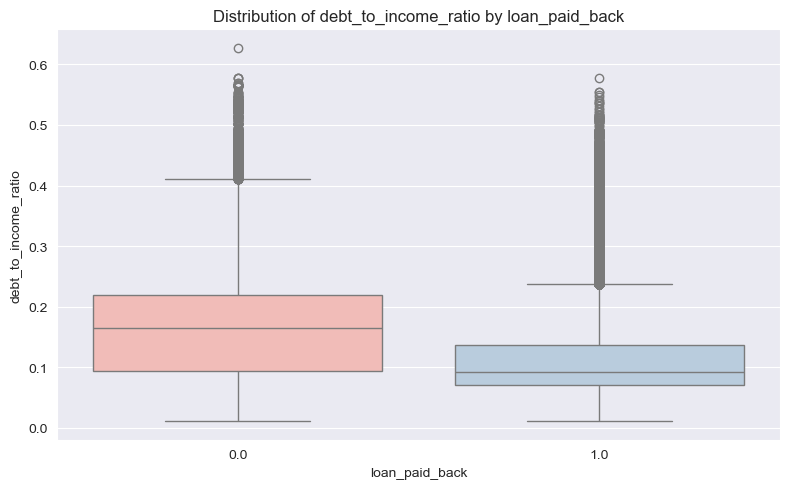

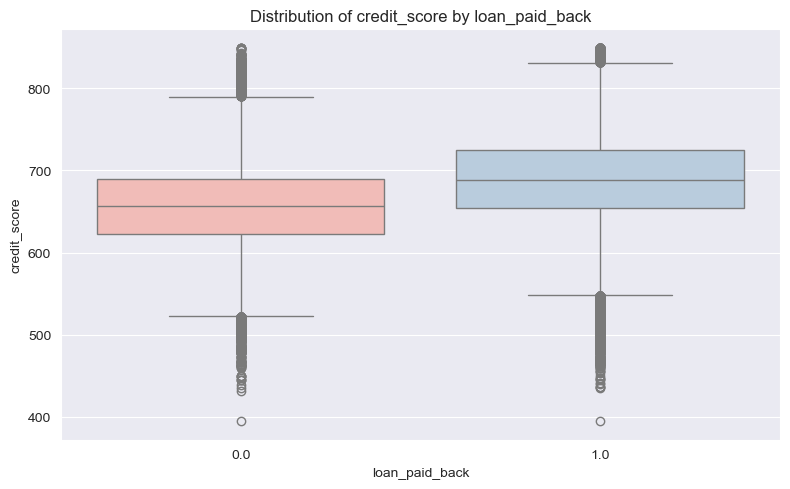

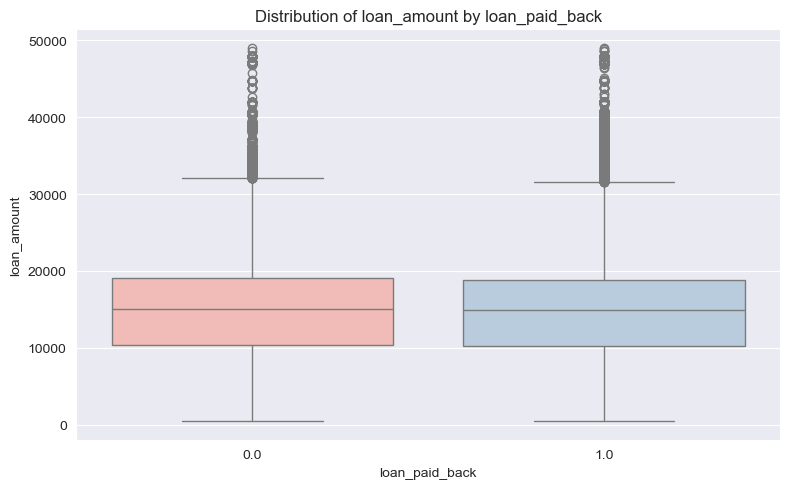

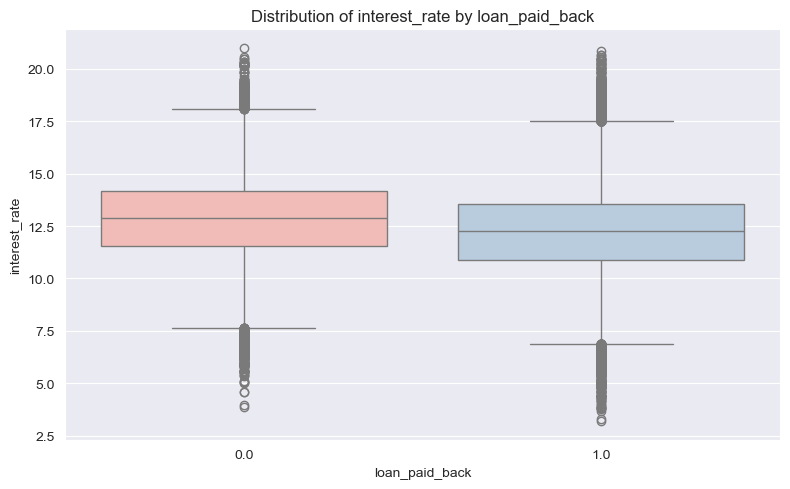

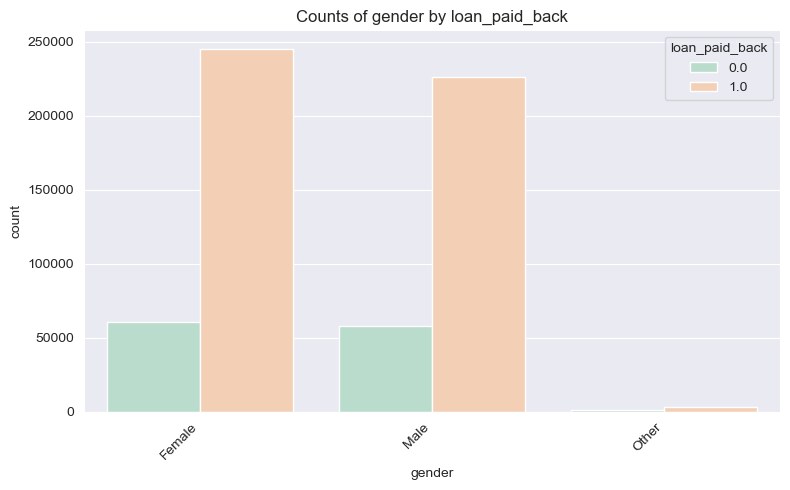

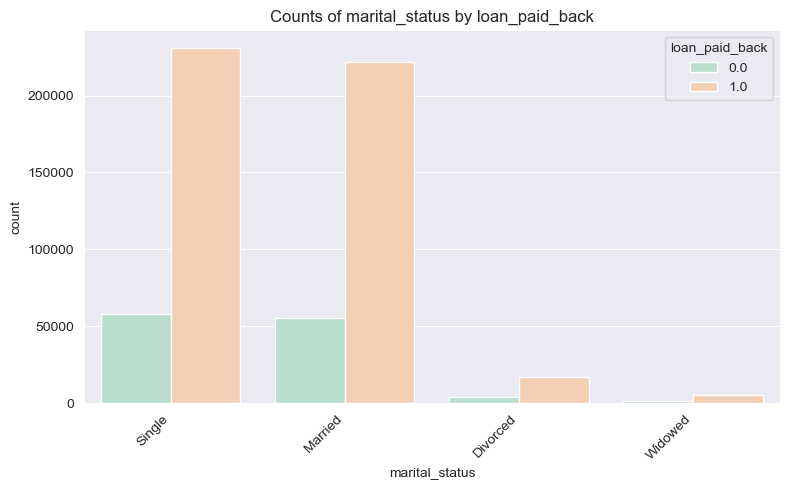

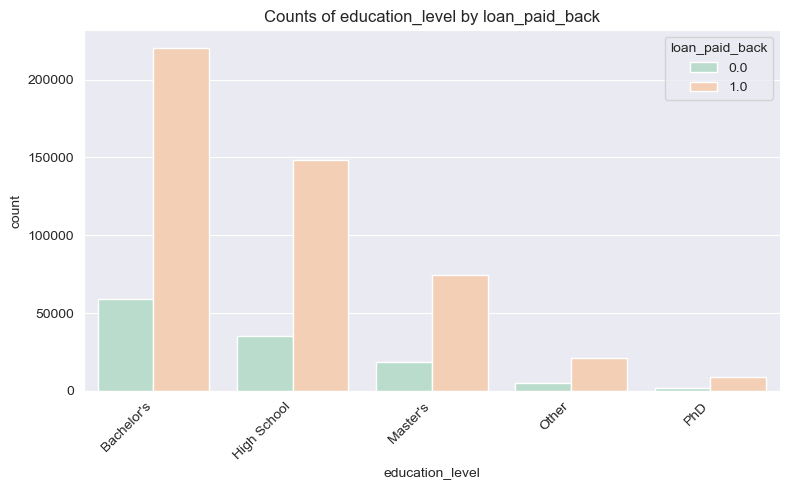

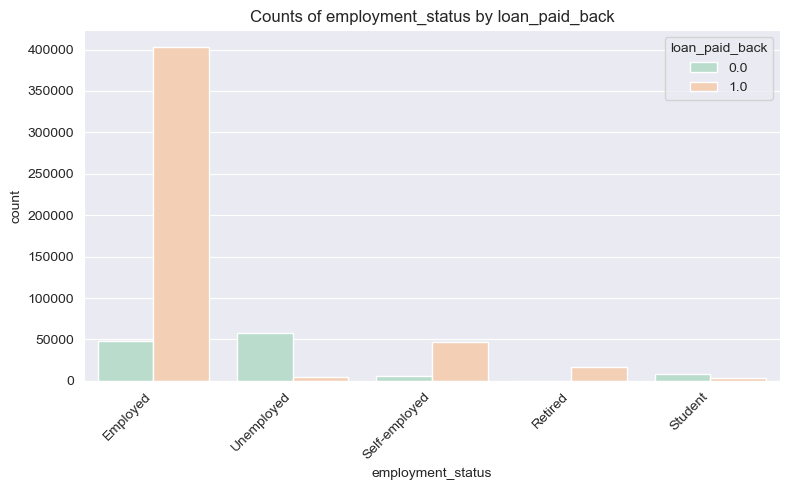

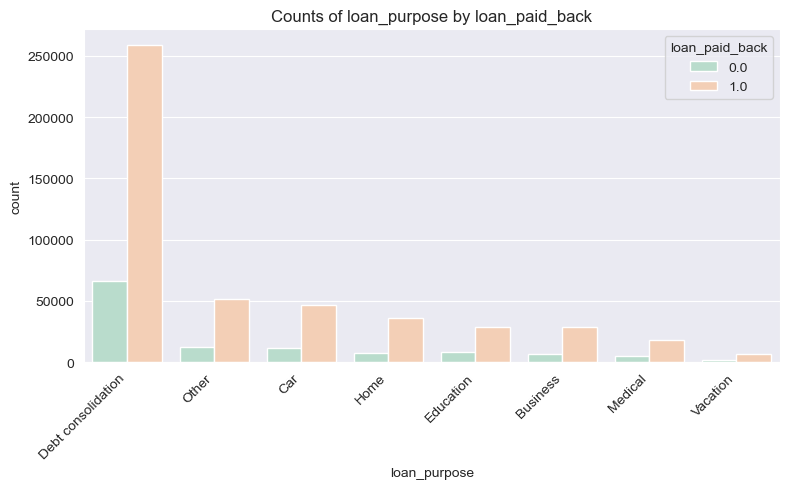

In [50]:
def plot_feature_vs_target(df, feature_name, target_name):
    plt.figure(figsize=(8, 5))

    if feature_name in numerical_vars:
        sns.boxplot(
            x=target_name,
            y=feature_name,
            data=df,
            hue=target_name,
            palette="Pastel1",
            legend=False
        )
        plt.title(f'Distribution of {feature_name} by {target_name}')

    elif feature_name in categorical_vars:
        sns.countplot(
            x=feature_name,
            hue=target_name,
            data=df,
            palette="Pastel2",
            order=df[feature_name].value_counts().index
        )
        plt.title(f'Counts of {feature_name} by {target_name}')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=target_name)

    else:
        print(f"Error: '{feature_name}' not recognized as a numerical or categorical variable.")
        return

    plt.tight_layout()
    plt.show()

full_categorical_vars = categorical_vars + ["grade_subgrade"]
full_vars = numerical_vars + full_categorical_vars

partial_vars = numerical_vars + categorical_vars

for col in partial_vars:
    plot_feature_vs_target(training, col, "loan_paid_back")

# Splitting and Preparing the Data

In [51]:
from sklearn.model_selection import train_test_split

SEED = 42

X = training[full_vars]
y = training["loan_paid_back"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=SEED
)

print(X_train.shape, X_test.shape)
print(y_train.value_counts())

(415795, 11) (178199, 11)
loan_paid_back
1.0    332392
0.0     83403
Name: count, dtype: int64


In [52]:
from sklearn.utils import resample

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
train_data = pd.concat([X_train, y_train], axis=1)

majority = train_data[train_data.loan_paid_back == 1]
minority = train_data[train_data.loan_paid_back == 0]

minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=SEED)

train_data_balanced = pd.concat([majority, minority_upsampled])
train_data_balanced = train_data_balanced.sample(frac=1, random_state=SEED).reset_index(drop=True)

X_train = train_data_balanced.drop('loan_paid_back', axis=1)
y_train = train_data_balanced['loan_paid_back']

print(f"Balanced Train Counts:\n{y_train.value_counts()}")

Balanced Train Counts:
loan_paid_back
0.0    332392
1.0    332392
Name: count, dtype: int64


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_num = scaler.fit_transform(X_train[numerical_vars])
X_train_scaled_df = pd.DataFrame(
    X_train_scaled_num,
    columns=numerical_vars,
    index=X_train.index
)

X_test_scaled_num = scaler.transform(X_test[numerical_vars])
X_test_scaled_df = pd.DataFrame(
    X_test_scaled_num,
    columns=numerical_vars,
    index=X_test.index
)

In [54]:
X_train_cat = pd.get_dummies(X_train[categorical_vars], drop_first=True)
X_test_cat = pd.get_dummies(X_test[categorical_vars], drop_first=True)

X_train_encoded_cat, X_test_encoded_cat = X_train_cat.align(
    X_test_cat,
    join='left',
    axis=1,
    fill_value=0
)

print(f"Encoded Shape Train: {X_train_encoded_cat.shape}, Test: {X_test_encoded_cat.shape}")

X_train_cat = pd.concat([X_train_scaled_df, X_train_encoded_cat], axis=1)
X_test_cat = pd.concat([X_test_scaled_df, X_test_encoded_cat], axis=1)

print(f"Final Feature Shape Train: {X_train_cat.shape}, Test: {X_test_cat.shape}")

Encoded Shape Train: (664784, 20), Test: (178199, 20)
Final Feature Shape Train: (664784, 25), Test: (178199, 25)


In [55]:
X_train_full = pd.get_dummies(X_train[full_categorical_vars], drop_first=True)
X_test_full = pd.get_dummies(X_test[full_categorical_vars], drop_first=True)

X_train_encoded_full, X_test_encoded_full = X_train_full.align(
    X_test_full,
    join='left',
    axis=1,
    fill_value=0
)

print(f"Encoded Shape Train: {X_train_encoded_full.shape}, Test: {X_test_encoded_full.shape}")

X_train_full = pd.concat([X_train_scaled_df, X_train_encoded_full], axis=1)
X_test_full = pd.concat([X_test_scaled_df, X_test_encoded_full], axis=1)

print(f"Final Feature Shape Train: {X_train_full.shape}, Test: {X_test_full.shape}")

Encoded Shape Train: (664784, 49), Test: (178199, 49)
Final Feature Shape Train: (664784, 54), Test: (178199, 54)


In [56]:
X_train_full.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender_Male,gender_Other,marital_status_Married,marital_status_Single,marital_status_Widowed,...,grade_subgrade_E1,grade_subgrade_E2,grade_subgrade_E3,grade_subgrade_E4,grade_subgrade_E5,grade_subgrade_F1,grade_subgrade_F2,grade_subgrade_F3,grade_subgrade_F4,grade_subgrade_F5
0,0.235828,1.255886,0.968334,-0.240341,-2.164065,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.618646,-0.563929,-0.165068,1.485890,-0.601779,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.663634,0.300806,1.004315,0.208898,-0.105816,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.686860,-0.512303,-0.848708,-0.382689,-0.229807,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.939451,0.210460,-0.039134,-1.195815,-1.137420,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# Feature Engineering

In [57]:
def create_features(df):
    df = df.copy()
    # Ratio of Loan to Annual income
    # Logic: People with high income relative to loan size are safer
    df['loan_income_ratio'] = df['loan_amount'] / df['annual_income']

    # Disposable Income Estimate
    # Logic: Income minus expected debt payments might be a better predictor
    df['disposable_income'] = df['annual_income'] * (1 - df['debt_to_income_ratio'])

    # Risk Interaction Term
    # Logic: High debt ratio combined with high interest rate suggests higher risk.
    df['risk'] = df['debt_to_income_ratio'] * df['interest_rate']

    # Log Transformation of Income
    # Logic: Reduces skew/outlier impact of annual_income. Add 1 to avoid log(0)
    df['log_annual_income'] = np.log1p(df['annual_income'] + 1)

    return df

feature_engineering = ['income_loan_ratio'] + ['disposable_income'] + ['risk'] + ['log_annual_income']
numerical_vars = numerical_vars + feature_engineering
full_vars = numerical_vars + full_categorical_vars

X_train_cat = create_features(X_train_cat)
X_test_cat = create_features(X_test_cat)

X_train_full = create_features(X_train_full)
X_test_full = create_features(X_test_full)

In [58]:
print(f"Final Feature Shape Train: {X_train_cat.shape}, Test: {X_test_cat.shape}")

Final Feature Shape Train: (664784, 29), Test: (178199, 29)


In [59]:
print(f"Final Feature Shape Train: {X_train_full.shape}, Test: {X_test_full.shape}")

Final Feature Shape Train: (664784, 58), Test: (178199, 58)


# Evaluation Function

In [60]:
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

def evaluate_and_graph(model, X_train, y_train, X_test, y_test, name, graph):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    if hasattr(model, "predict_proba"):
        y_prob_test = model.predict_proba(X_test)[:, 1]
        y_prob_train = model.predict_proba(X_train)[:, 1]
    else:
        y_prob_test = model.decision_function(X_test)
        y_prob_train = model.decision_function(X_train)

    test_acc = accuracy_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_prob_test)
    test_ap = average_precision_score(y_test, y_prob_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_prob_train)

    print(f"--- {name} ---")
    print(f"Train Accuracy: {train_acc:.4f} | Train AUC: {train_auc:.4f}")
    print(f"Test  Accuracy: {test_acc:.4f} | Test  AUC: {test_auc:.4f}")

    if (train_acc - test_acc) > 0.05:
         print("⚠️ Warning: Signs of Overfitting (Train is much better than Test)")
    else:
         print("✅ Model seems balanced")
    print("-" * 30)

    fpr, tpr, _ = roc_curve(y_test, y_prob_test)
    precision, recall, _ = precision_recall_curve(y_test, y_prob_test)

    if graph:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # --- Plot 1: ROC Curve ---
        axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {test_auc:.3f}')
        axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
        axes[0].set_xlim([0.0, 1.0])
        axes[0].set_ylim([0.0, 1.05])
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].set_title(f'ROC Curve: {name}')
        axes[0].legend(loc="lower right")
        axes[0].grid(True, alpha=0.3)

        # --- Plot 2: Precision-Recall Curve ---
        # "No Skill" baseline is just the percentage of positive cases
        no_skill = y_test.mean()

        axes[1].plot(recall, precision, color='green', lw=2, label=f'Avg Precision = {test_ap:.3f}')
        axes[1].plot([0, 1], [no_skill, no_skill], color='navy', linestyle='--', label='No Skill')
        axes[1].set_xlim([0.0, 1.0])
        # because the test is not balanced, I will only graph some of the PR curve to make it more readable
        axes[1].set_ylim([0.5, 1.05])
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].set_title(f'PR Curve: {name}')
        axes[1].legend(loc="upper right")
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    return {
        "model": name,
        "accuracy": test_acc,
        "auc": test_auc,
        "average_precision": test_ap,
        "train_accuracy": train_acc,
        "train_auc": train_auc
    }

# Decision Trees (Gini and Entropy)

--- Decision Tree (Entropy) Cat ---
Train Accuracy: 0.8346 | Train AUC: 0.9169
Test  Accuracy: 0.8630 | Test  AUC: 0.9117
✅ Model seems balanced
------------------------------


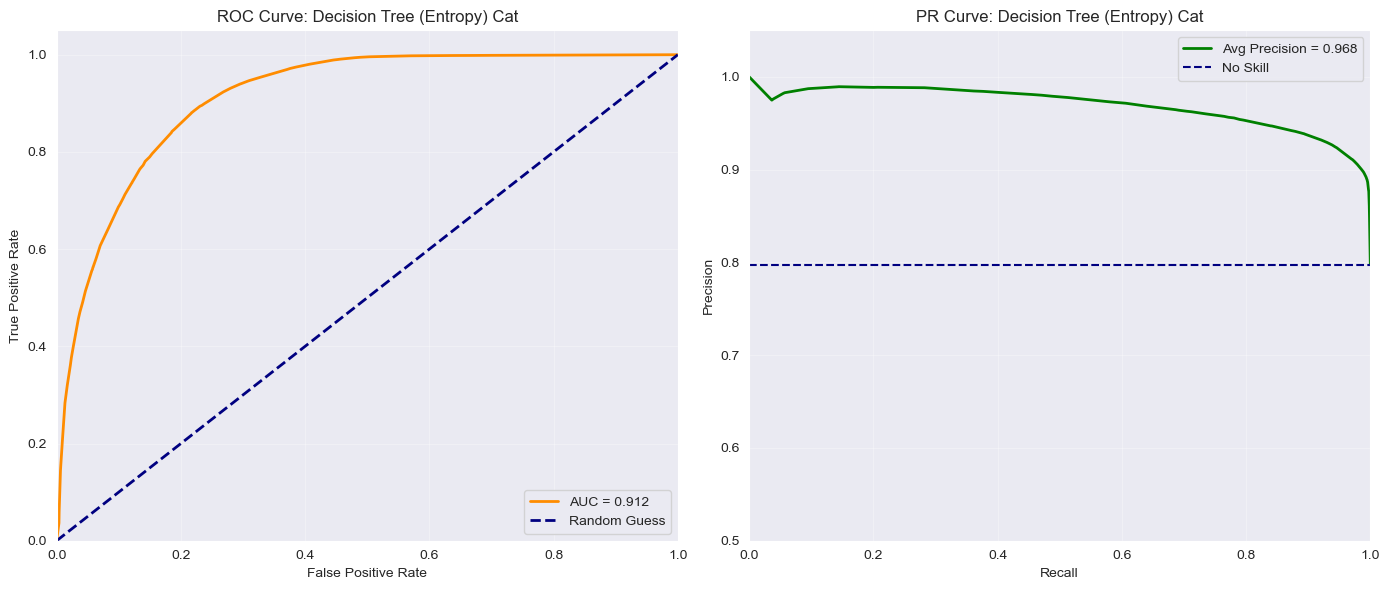

In [61]:
from sklearn.tree import DecisionTreeClassifier

results = []

dt_entropy_cat = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=SEED)
results.append(
    evaluate_and_graph(dt_entropy_cat, X_train_cat, y_train, X_test_cat, y_test, "Decision Tree (Entropy) Cat", True)
)

# Random Forest Classifier Model

--- Random Forest Cat ---
Train Accuracy: 0.8319 | Train AUC: 0.9154
Test  Accuracy: 0.8624 | Test  AUC: 0.9124
✅ Model seems balanced
------------------------------


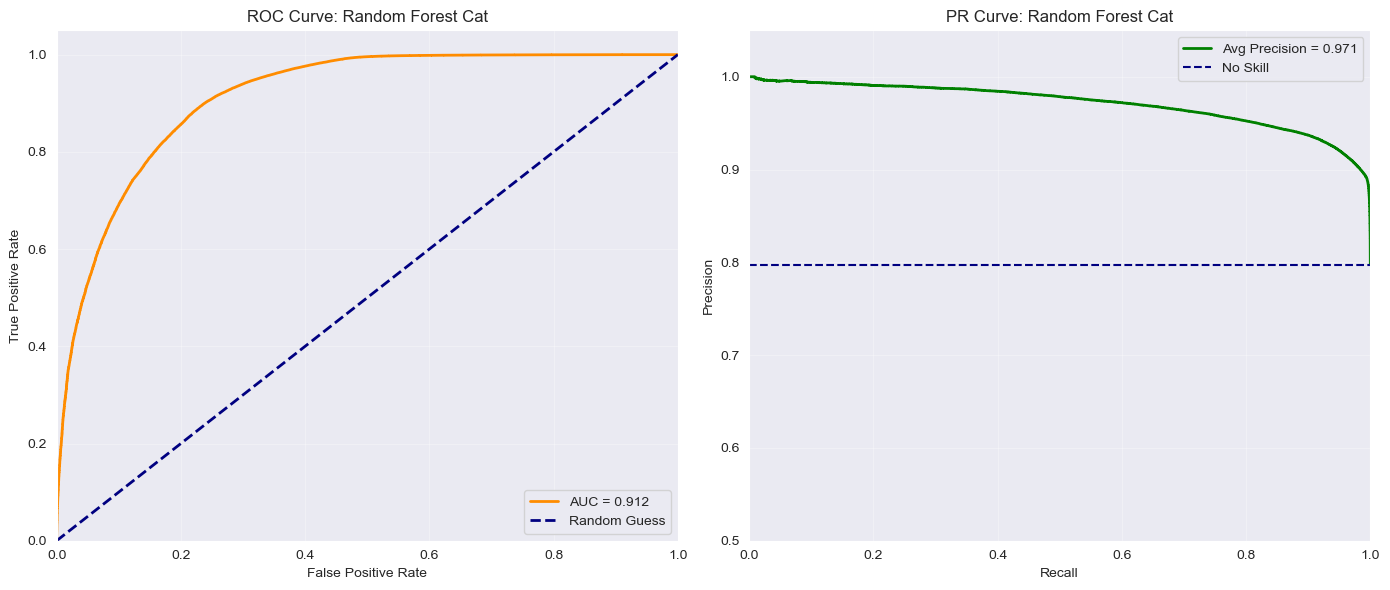

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf_cat = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=SEED)
results.append(
    evaluate_and_graph(rf_cat, X_train_cat, y_train, X_test_cat, y_test, "Random Forest Cat", True)
)

# Gradient Boosting Classifier Model

--- Gradient Boosting Cat ---
Train Accuracy: 0.8328 | Train AUC: 0.9155
Test  Accuracy: 0.8619 | Test  AUC: 0.9164
✅ Model seems balanced
------------------------------


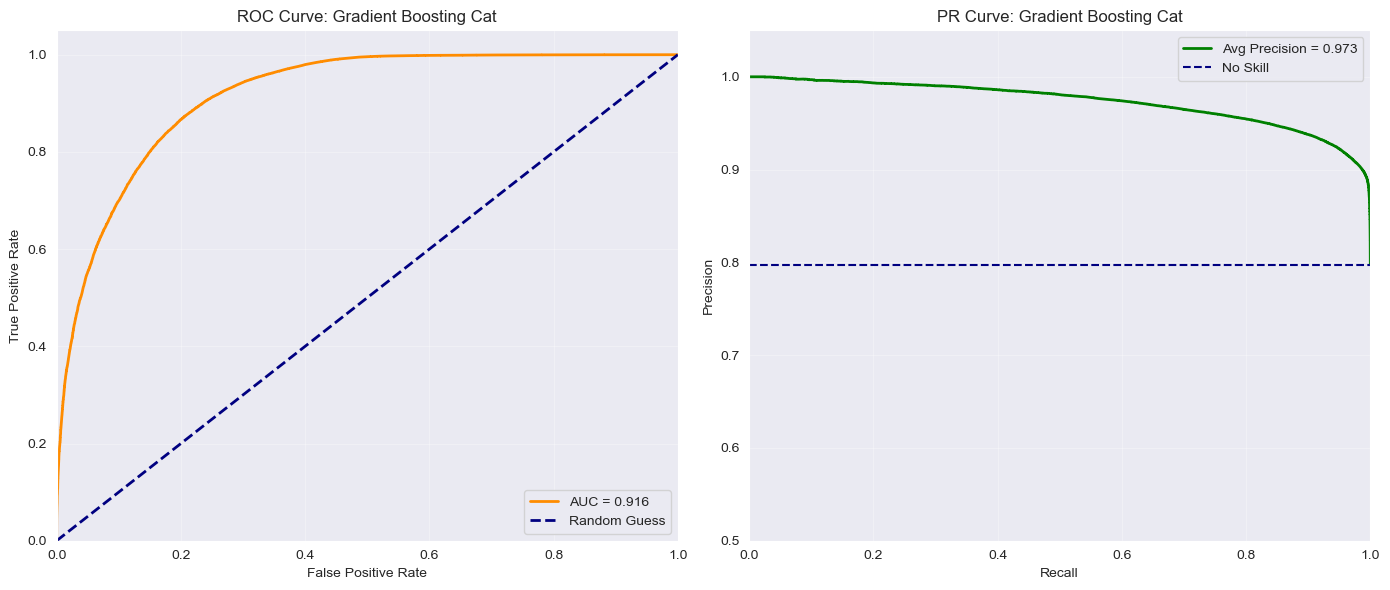

--- Gradient Boosting Full ---
Train Accuracy: 0.8329 | Train AUC: 0.9155
Test  Accuracy: 0.8625 | Test  AUC: 0.9164
✅ Model seems balanced
------------------------------


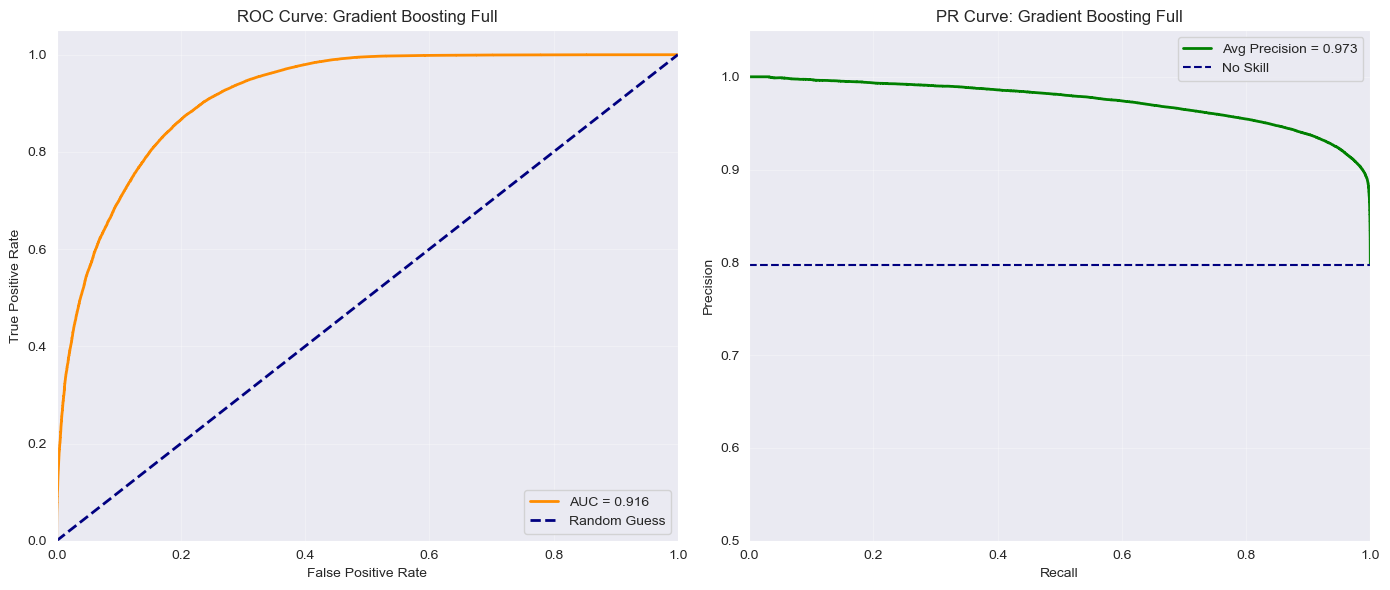

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

gb_cat = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=SEED)
results.append(
    evaluate_and_graph(gb_cat, X_train_cat, y_train, X_test_cat, y_test, "Gradient Boosting Cat", True)
)

gb_full = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=SEED)
results.append(
    evaluate_and_graph(gb_full, X_train_full, y_train, X_test_full, y_test, "Gradient Boosting Full", True)
)

# Results

~ 0 seconds

In [64]:
with pd.option_context('display.max_rows', None):
    display(pd.DataFrame(results))

,model,accuracy,auc,average_precision,train_accuracy,train_auc
0,Decision Tree (Entropy) Cat,0.862962,0.911714,0.968073,0.834569,0.916918
1,Random Forest Cat,0.862446,0.912432,0.970953,0.831866,0.915420
2,Gradient Boosting Cat,0.861851,0.916421,0.973045,0.832783,0.915525
3,Gradient Boosting Full,0.862452,0.916426,0.973018,0.832855,0.915540


In [65]:
def pick_best_model(dataframe, overfit_threshold=0.05):
    if dataframe is None or dataframe.empty:
        print("No models provided (empty DataFrame).")
        return None

    df = dataframe.copy()

    df['overfitting_gap'] = df['train_auc'] - df['auc']
    df['is_overfit'] = df['overfitting_gap'] > overfit_threshold

    df_valid = df[df['is_overfit'] == False].copy()
    df_overfit = df[df['is_overfit'] == True].copy()

    print(f"Total Models: {len(df)}")
    print(f"Valid Models: {len(df_valid)}")
    print(f"Disqualified Models: {len(df_overfit)}")

    if not df_overfit.empty:
        print("\n⚠️ The following models were disqualified due to overfitting:")
        display(df_overfit[['model', 'accuracy', 'auc', 'train_auc', 'overfitting_gap']])
    else:
        print("\n✅ No models were disqualified for overfitting.")

    if df_valid.empty:
        print("\n⚠️ All models are overfitting (by the chosen threshold).")
        print("Falling back to ranking ALL models by AUC.")
        df_valid = df.copy()

    print("Best by Accuracy:")
    display(df_valid.sort_values(by="accuracy", ascending=False).head(1))

    print("Best by AUC:")
    display(df_valid.sort_values(by="auc", ascending=False).head(1))

    print("Best by Average Precision:")
    display(df_valid.sort_values(by="average_precision", ascending=False).head(1))

    df_valid_ranked = df_valid.copy()
    df_valid_ranked["rank_acc"] = df_valid["accuracy"].rank(ascending=False)
    df_valid_ranked["rank_auc"] = df_valid["auc"].rank(ascending=False)
    df_valid_ranked["rank_ap"] = df_valid["average_precision"].rank(ascending=False)


    final_ranking = df_valid_ranked.sort_values(
        by=["rank_auc", "rank_acc", "rank_ap"]
    )

    cols = ['model', 'accuracy', 'auc', 'average_precision', 'overfitting_gap']
    print("\nFinal ranking (higher = better):")
    display(final_ranking[cols])

    best_model_row = final_ranking.iloc[0]
    best_model_name = best_model_row['model']
    print(f"\n🏆 Best model: {best_model_name}")

    return best_model_name

In [66]:
df = pd.DataFrame(results)
best_model_1 = pick_best_model(df, overfit_threshold=0.05)

Total Models: 4
Valid Models: 4
Disqualified Models: 0

✅ No models were disqualified for overfitting.
Best by Accuracy:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
0,Decision Tree (Entropy) Cat,0.862962,0.911714,0.968073,0.834569,0.916918,0.005205,False


Best by AUC:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
3,Gradient Boosting Full,0.862452,0.916426,0.973018,0.832855,0.91554,-0.000886,False


Best by Average Precision:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
2,Gradient Boosting Cat,0.861851,0.916421,0.973045,0.832783,0.915525,-0.000896,False



Final ranking (higher = better):


,model,accuracy,auc,average_precision,overfitting_gap
3,Gradient Boosting Full,0.862452,0.916426,0.973018,-0.000886
2,Gradient Boosting Cat,0.861851,0.916421,0.973045,-0.000896
1,Random Forest Cat,0.862446,0.912432,0.970953,0.002989
0,Decision Tree (Entropy) Cat,0.862962,0.911714,0.968073,0.005205



🏆 Best model: Gradient Boosting Full


# Models Full with Hyperparameter Tuning

Hyperparametizing based on results from other code runs


Starting Fitting for Best Gradient Boosting Cat...
--- Gradient Boosting (Best Run) Cat Results ---
--- Gradient Boosting (Best Run) Full ---
Train Accuracy: 0.8669 | Train AUC: 0.9474
Test  Accuracy: 0.8758 | Test  AUC: 0.9221
✅ Model seems balanced
------------------------------


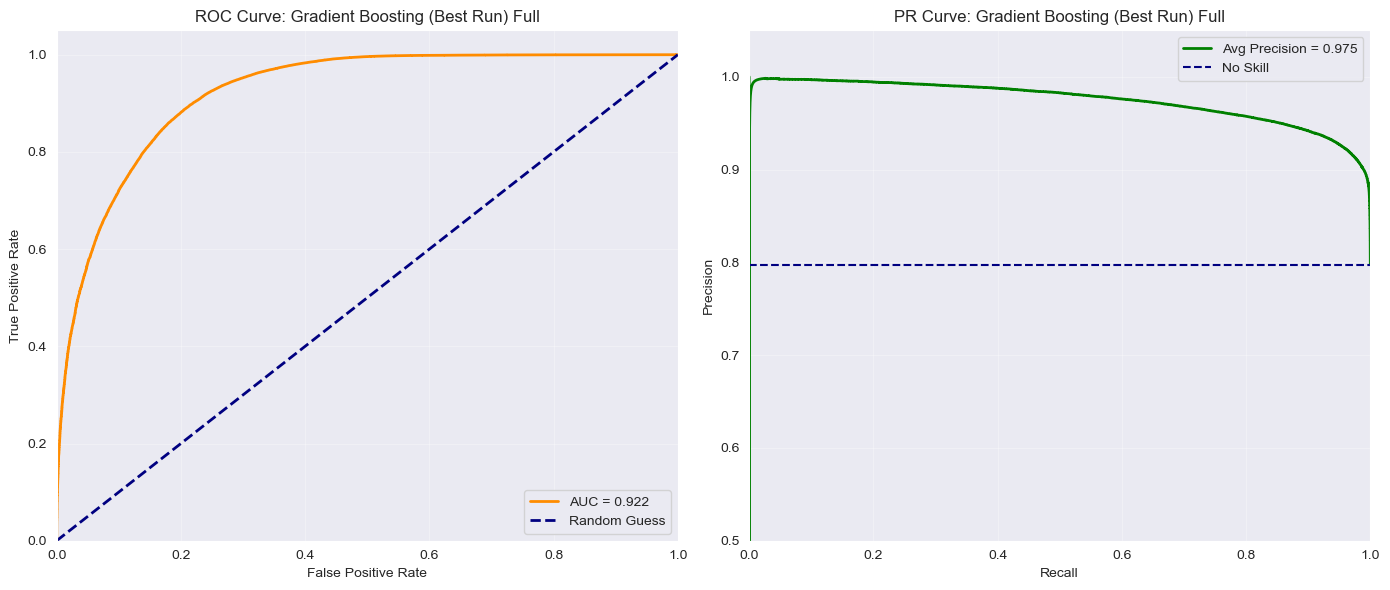

In [77]:
best_params = {
    'learning_rate': np.float64(0.09522449329415009),
    'max_depth': 7,
    'n_estimators': 378
}

best_gb_full = GradientBoostingClassifier(
    random_state=SEED,
    **best_params
)

print("\nStarting Fitting for Best Gradient Boosting Cat...")
best_gb_full.fit(X_train_full, y_train)

print("--- Gradient Boosting (Best Run) Cat Results ---")
best_run_full_gb = best_gb_full

results.append(
    evaluate_and_graph(best_run_full_gb, X_train_cat, y_train, X_test_cat, y_test, "Gradient Boosting (Best Run) Full", True)
)

In [78]:
'''best_params = {
    'learning_rate': np.float64(0.09522449329415009),
    'max_depth': 7,
    'n_estimators': 378
}

best_gb_cat = GradientBoostingClassifier(
    random_state=SEED,
    **best_params
)

print("\nStarting Fitting for Best Gradient Boosting Cat...")
best_gb_cat.fit(X_train_cat, y_train)

print("--- Gradient Boosting (Best Run) Cat Results ---")
best_run_cat_gb = best_gb_cat

results.append(
    evaluate_and_graph(best_run_cat_gb, X_train_cat, y_train, X_test_cat, y_test, "Gradient Boosting (Best Run) Cat", True)
)'''

'best_params = {\n}\n\nbest_gb_cat = GradientBoostingClassifier(\n    random_state=SEED,\n    **best_params\n)\n\nprint("\nStarting Fitting for Best Gradient Boosting Cat...")\nbest_gb_cat.fit(X_train_cat, y_train)\n\nprint("--- Gradient Boosting (Best Run) Cat Results ---")\nbest_run_cat_gb = best_gb_cat\n\nresults.append(\n    evaluate_and_graph(best_run_cat_gb, X_train_cat, y_train, X_test_cat, y_test, "Gradient Boosting (Best Run) Cat", True)\n)'

In [79]:
'''best_params = {
}

best_rf_cat = RandomForestClassifier(
    random_state=SEED,
    **best_params
)

print("\nStarting Fitting for Best Random Forest...")
best_rf_cat.fit(X_train_cat, y_train)

print("--- Random Forest (Best Run) Cat Results ---")
best_run_cat_dt = best_rf_cat

results.append(
    evaluate_and_graph(best_run_cat_dt, X_train_cat, y_train, X_test_cat, y_test, "Random Forest (Best Run) Cat", True)
)'''

'best_params = {\n}\n\nbest_rf_cat = RandomForestClassifier(\n    random_state=SEED,\n    **best_params\n)\n\nprint("\nStarting Fitting for Best Random Forest...")\nbest_rf_cat.fit(X_train_cat, y_train)\n\nprint("--- Random Forest (Best Run) Cat Results ---")\nbest_run_cat_dt = best_rf_cat\n\nresults.append(\n    evaluate_and_graph(best_run_cat_dt, X_train_cat, y_train, X_test_cat, y_test, "Random Forest (Best Run) Cat", True)\n)'


Starting Fitting for Best Decision Tree (Entropy)...
--- Decision Tree (Entropy, Best Run) Results ---
--- Decision Tree (Entropy, Best Run) Cat ---
Train Accuracy: 0.9282 | Train AUC: 0.9864
Test  Accuracy: 0.8416 | Test  AUC: 0.8326
⚠️ Warning: Signs of Overfitting (Train is much better than Test)
------------------------------


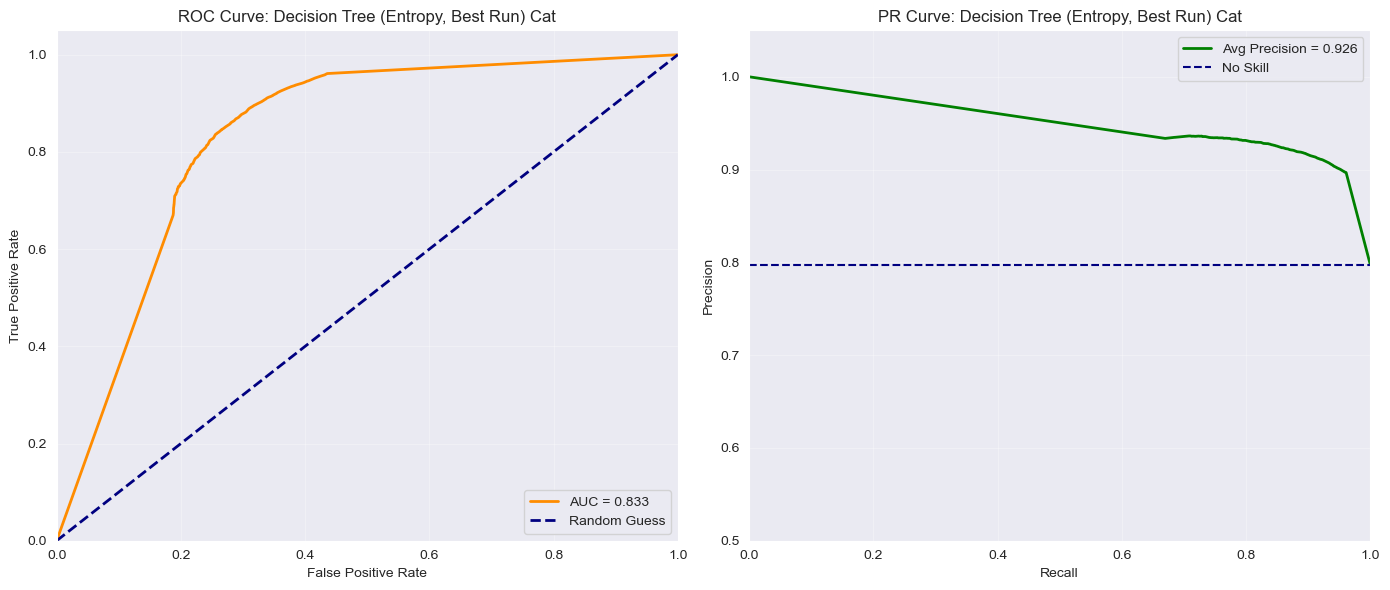

In [73]:
best_params = {
    'max_depth': 29,
    'min_samples_leaf': 7,
    'min_samples_split': 14
}

best_dt_cat = DecisionTreeClassifier(
    criterion='entropy',
    random_state=SEED,
    **best_params
)

print("\nStarting Fitting for Best Decision Tree (Entropy)...")
best_dt_cat.fit(X_train_cat, y_train)

print("--- Decision Tree (Entropy, Best Run) Results ---")
best_run_cat_dt = best_dt_cat

results.append(
    evaluate_and_graph(best_run_cat_dt, X_train_cat, y_train, X_test_cat, y_test, "Decision Tree (Entropy, Best Run) Cat", True)
)

# Results Final

~ 0 seconds

In [80]:
df = pd.DataFrame(results)
best_model_2 = pick_best_model(df, overfit_threshold=0.05)

Total Models: 6
Valid Models: 5
Disqualified Models: 1

⚠️ The following models were disqualified due to overfitting:


,model,accuracy,auc,train_auc,overfitting_gap
4,"Decision Tree (Entropy, Best Run) Cat",0.841576,0.832649,0.986446,0.153797


Best by Accuracy:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
5,Gradient Boosting (Best Run) Full,0.875835,0.922056,0.974609,0.866867,0.947375,0.02532,False


Best by AUC:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
5,Gradient Boosting (Best Run) Full,0.875835,0.922056,0.974609,0.866867,0.947375,0.02532,False


Best by Average Precision:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
5,Gradient Boosting (Best Run) Full,0.875835,0.922056,0.974609,0.866867,0.947375,0.02532,False



Final ranking (higher = better):


,model,accuracy,auc,average_precision,overfitting_gap
5,Gradient Boosting (Best Run) Full,0.875835,0.922056,0.974609,0.025320
3,Gradient Boosting Full,0.862452,0.916426,0.973018,-0.000886
2,Gradient Boosting Cat,0.861851,0.916421,0.973045,-0.000896
1,Random Forest Cat,0.862446,0.912432,0.970953,0.002989
0,Decision Tree (Entropy) Cat,0.862962,0.911714,0.968073,0.005205



🏆 Best model: Gradient Boosting (Best Run) Full


# Submission for Kaggle

Manual Process, must use results to correctly call the best model

~ .4 seconds

In [83]:
numerical_vars = ["annual_income","debt_to_income_ratio","credit_score", "loan_amount", "interest_rate"]

testing_scaled_num = scaler.transform(testing[numerical_vars])
testing_scaled_df = pd.DataFrame(
    testing_scaled_num,
    columns=numerical_vars,
    index=testing.index
)

testing_cat_dummies = pd.get_dummies(testing[categorical_vars], drop_first=True)

_, testing_encoded_aligned = X_train_encoded_cat.align(
    testing_cat_dummies,
    join='left',
    axis=1,
    fill_value=0
)

numerical_vars = numerical_vars + feature_engineering
full_vars = numerical_vars + full_categorical_vars

testing_cat_final = pd.concat([testing_scaled_df, testing_encoded_aligned], axis=1)

print(f"Training shape: {X_train_cat.shape}")
print(f"Testing shape:  {testing_cat_final.shape}")

numerical_vars = numerical_vars + feature_engineering
full_vars = numerical_vars + full_categorical_vars

X_testing_cat_final = create_features(testing_cat_final)
print(f"Final shape:  {X_testing_cat_final.shape}")

Training shape: (664784, 29)
Testing shape:  (254569, 25)
Final shape:  (254569, 29)


In [84]:
predictions = best_gb_full.predict_proba(X_testing_cat_final)[:, 1]

submission = pd.DataFrame({
    'id': testing.index,
    'loan_paid_back': predictions
})

# 7. Save to CSV
submission.to_csv('submission_class_models_best_gb_full.csv', index=False)

print("Submission saved successfully!")
submission.head()

Submission saved successfully!


,id,loan_paid_back
0,593994,0.776105
1,593995,0.948498
2,593996,0.179118
3,593997,0.747047
4,593998,0.844532
